[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab07.ipynb)

# Theoretical Analysis

# Scenario A: Fitting Constant Predictor from Scratch

We minimize the binary cross-entropy loss:
$$
L(\lambda) = -\sum_{i=1}^n \left[y_i \log(\sigma(\lambda)) + (1-y_i) \log(1-\sigma(\lambda))\right]
$$

**Derivation:**  
1. Compute derivative:
$$\frac{dL}{d\lambda} = -\sum_{i=1}^n \left[y_i(1-\sigma(\lambda)) - (1-y_i)\sigma(\lambda)\right] = -\sum_{i=1}^n \left[y_i - \sigma(\lambda)\right]$$

2. Set derivative to zero:
$$\sum y_i = n\sigma(\lambda) \implies m = (m+k)\sigma(\lambda)$$

3. Solve for λ:
$$\lambda^* = \log\left(\frac{m}{k}\right)$$

**Interpretation:**  
The optimal constant λ is the log-odds of the positive class ratio in the dataset.

# Scenario B: Additive Shift in Forward Stagewise

We minimize:
$$
L(\lambda) = -\sum_{i=1}^n \left[y_i \log(\sigma(f_i + \lambda)) + (1-y_i) \log(1-\sigma(f_i + \lambda))\right]
$$

**Derivation:**  
1. Compute derivative:
$$\frac{dL}{d\lambda} = -\sum_{i=1}^n \left[y_i - \sigma(f_i + \lambda)\right]$$

2. Set derivative to zero gives implicit equation:
$$\sum_{i=1}^n y_i = \sum_{i=1}^n \sigma(f_i + \lambda)$$

**Discussion:**  
Unlike Scenario A, this equation has no closed-form solution because:
1. Each term σ(f_i + λ) is different
2. The sigmoid function is non-linear
3. The equation cannot be simplified to isolate λ

# Empirical Analysis

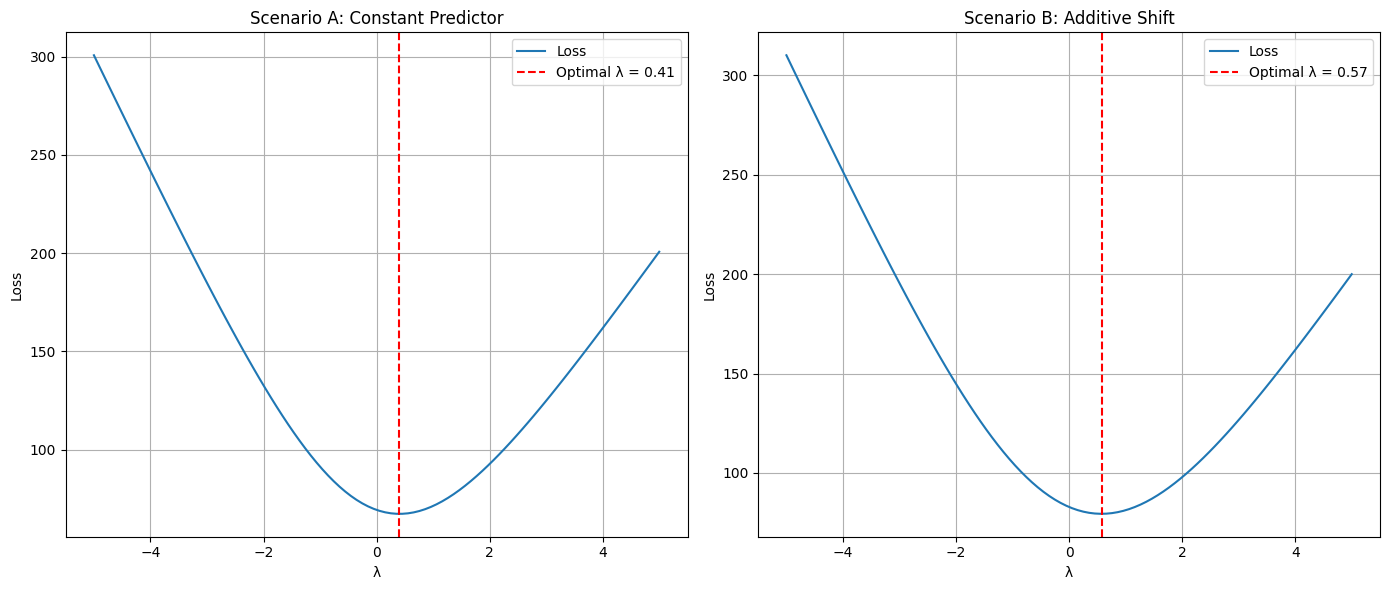

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from scipy.optimize import minimize_scalar

# Parameters
np.random.seed(42)
n = 100  # Total samples
m = 60   # Number of ones
k = n - m  # Number of zeros
y = np.concatenate([np.ones(m), np.zeros(k)])

# Generate random predictions from previous stage
f = np.random.normal(0, 1, n)

# Scenario A: Loss function
def loss_A(lam):
    p = sigmoid(lam)
    return - (m * np.log(p) + k * np.log(1 - p))

# Scenario B: Loss function
def loss_B(lam):
    p = sigmoid(f + lam)
    return -np.sum(y * np.log(p) + (1-y) * np.log(1-p))

# Compute losses for plotting
lambda_range = np.linspace(-5, 5, 100)
losses_A = [loss_A(lam) for lam in lambda_range]
losses_B = [loss_B(lam) for lam in lambda_range]

plt.figure(figsize=(14, 6))

# Scenario A
plt.subplot(1, 2, 1)
plt.plot(lambda_range, losses_A, label='Loss')
plt.axvline(x=np.log(m/k), color='r', linestyle='--',
           label=f'Optimal λ = {np.log(m/k):.2f}')
plt.title('Scenario A: Constant Predictor')
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Scenario B
plt.subplot(1, 2, 2)
plt.plot(lambda_range, losses_B, label='Loss')
plt.title('Scenario B: Additive Shift')
plt.xlabel('λ')
plt.ylabel('Loss')
plt.grid()

# Find and plot optimal λ for Scenario B numerically
result = minimize_scalar(loss_B, bounds=(-5, 5), method='bounded')
optimal_lambda = result.x
plt.axvline(x=optimal_lambda, color='r', linestyle='--',
           label=f'Optimal λ = {optimal_lambda:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Discussion

Loss landscape in Scenario A is simpler than in Scenario B, both scenarios are unimodal (single global minimum).

**Is it thinkable the lambda minimizer in Scenario B can be found numerically?**
Yes, in Scenario B λ can be found numerically because Loss remains conves and gradient methods converge.

Difficulty of Scenario B comes from Non-linearity of sigmoid interactions not from Landscape complexity (because this is still convex).
So the difficulty is more mathematical rather than computional.